In [1]:
import sys
sys.path.append('../')
from KS import KS
from scipy.integrate import odeint
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.size": '16',
})

In [2]:
ks = KS(L=22.0, K=15, dt=0.01)

In [3]:
# random trajectory
np.random.seed(42)
ic = ks.flow(np.random.randn(ks.d) * 0.01, 100) # transient
tt = np.arange(0, 1000, 0.01)
sol = odeint(ks.rhs, ic, tt)

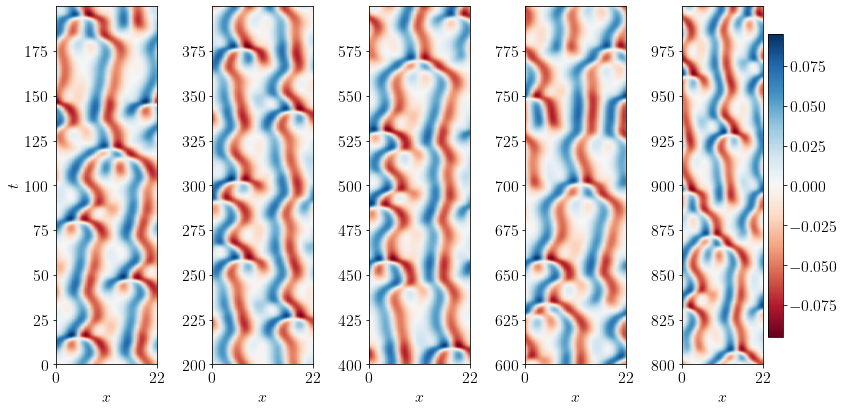

In [30]:
fig, axes = plt.subplots(1, 5, figsize=(12,6))
nskip = 10

for k, ax in enumerate(axes):
    it_i = (len(tt) // len(axes)) * k
    it_f = (len(tt) // len(axes)) * (k+1)
    
    if k==0:
        im, _, _ = ks.plot_spacetime(sol[it_i:it_f:nskip], tt[it_i:it_f:nskip], ax=ax, vmin=-0.095, vmax=0.095)
        ax.set_ylabel("$t$")
        fig.colorbar(im, ax=axes[-1])    
    else:
        im, _, _ = ks.plot_spacetime(sol[it_i:it_f:nskip], tt[it_i:it_f:nskip], ax=ax, vmin=-0.095, vmax=0.095)
        ax.set_ylabel('')

    ax.set_xticks([0, ks.L])
    ax.set_xlabel("$x$")

np.savetxt("vrange.dat", np.array([vmin, vmax]))    
fig.tight_layout()
fig.savefig("../tex/fig/spacetime.png", dpi=150)